# Emotion Inference and Sentiment Application in Audit

## Nicola Stone & Ish Hassan

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.figure_factory as ff

from src.emotion_classifier import EmotionClassifier
from data.ASIC import data

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_rows', None)

# Load our Custom Emotion Model for Inference

In [11]:
emotion_pipeline = EmotionClassifier()

# Get Tweet Data and Run Emotion Model

In [12]:
tweets = [{**tweet, **emotion_pipeline.inference(tweet["text"])} for tweet in data]

# Make It Prettier and More Human Friendly

In [13]:
df = pd.DataFrame(tweets)
df = df.sort_values("sentiment_positive", ascending=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.sample(n=20)

,text,neutral,surprise,anger,fear,disgust,sadness,joy,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-02-21 17:05:03+00:00,ASIC investigates a case of potential market manipulation in the derivatives market.,0.27,0.01,0.10,0.51,0.05,0.06,0.00,0.02,0.72,0.27
2022-01-25 10:10:35+00:00,ASIC launches a new online portal for submitting regulatory filings.,0.90,0.05,0.02,0.01,0.00,0.00,0.02,0.06,0.04,0.90
2022-02-18 15:55:32+00:00,ASIC reminds financial advisers to update their details on the Financial Advisers Register.,0.93,0.02,0.01,0.01,0.01,0.03,0.00,0.02,0.05,0.93
2022-02-17 17:05:21+00:00,ASIC's annual report on the supervision of markets and infrastructure is now available.,0.85,0.06,0.02,0.01,0.01,0.01,0.04,0.10,0.05,0.85
2022-02-03 11:15:12+00:00,ASIC launches a new initiative to promote financial literacy among young Australians.,0.80,0.08,0.01,0.02,0.00,0.01,0.08,0.16,0.04,0.80
2022-01-31 14:35:06+00:00,ASIC launches an education campaign to raise awareness about investment scams.,0.40,0.01,0.03,0.51,0.02,0.03,0.01,0.02,0.58,0.40
2022-01-24 15:55:10+00:00,ASIC's website will be undergoing maintenance tonight. Apologies for any inconvenience caused.,0.09,0.01,0.01,0.01,0.01,0.86,0.00,0.01,0.90,0.09
2022-01-29 17:05:41+00:00,Reminder: ASIC's licensing fees are due for payment by the end of this month.,0.83,0.11,0.01,0.01,0.00,0.03,0.01,0.12,0.05,0.83
2022-02-23 14:55:45+00:00,ASIC investigates a case of potential misconduct by a credit provider.,0.17,0.01,0.33,0.16,0.21,0.11,0.00,0.01,0.82,0.17


# Top 10 Most `Positive` Tweets 😀

In [14]:
df.iloc[:10]

,text,neutral,surprise,anger,fear,disgust,sadness,joy,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-01-26 11:25:14+00:00,"Happy Australia Day! ASIC's offices will be closed today, and normal operations will resume tomorrow.",0.04,0.17,0.01,0.00,0.00,0.07,0.71,0.88,0.08,0.04
2022-01-21 16:10:36+00:00,Reminder: ASIC's annual conference on regulatory compliance is just around the corner.,0.74,0.19,0.01,0.02,0.00,0.01,0.02,0.22,0.04,0.74
2022-02-22 10:15:38+00:00,ASIC releases a report on the performance of Australia's superannuation sector.,0.77,0.10,0.01,0.01,0.01,0.02,0.08,0.18,0.05,0.77
2022-02-23 11:25:12+00:00,ASIC hosts a webinar on financial literacy for young Australians.,0.76,0.04,0.01,0.03,0.01,0.01,0.14,0.18,0.06,0.76
2022-03-03 11:25:11+00:00,ASIC hosts a webinar on financial literacy for young Australians.,0.76,0.04,0.01,0.03,0.01,0.01,0.14,0.18,0.06,0.76
2022-02-03 11:15:12+00:00,ASIC launches a new initiative to promote financial literacy among young Australians.,0.80,0.08,0.01,0.02,0.00,0.01,0.08,0.16,0.04,0.80
2022-02-11 09:30:13+00:00,ASIC releases a report on the performance of Australia's financial markets in the past quarter.,0.82,0.08,0.01,0.01,0.01,0.03,0.05,0.12,0.06,0.82
2022-01-29 17:05:41+00:00,Reminder: ASIC's licensing fees are due for payment by the end of this month.,0.83,0.11,0.01,0.01,0.00,0.03,0.01,0.12,0.05,0.83
2022-02-26 09:40:27+00:00,ASIC announces changes to the regulatory framework for credit rating agencies.,0.78,0.07,0.03,0.05,0.00,0.02,0.05,0.12,0.10,0.78


# Top 10 Most `Negative` Tweets 😡

In [15]:
df.iloc[-10:]

,text,neutral,surprise,anger,fear,disgust,sadness,joy,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-02-18 10:20:43+00:00,ASIC issues a warning about a fraudulent investment scheme targeting vulnerable individuals.,0.07,0.01,0.04,0.82,0.03,0.03,0.00,0.01,0.92,0.07
2022-02-27 10:20:43+00:00,ASIC issues a warning about a fraudulent investment scheme targeting vulnerable individuals.,0.07,0.01,0.04,0.82,0.03,0.03,0.00,0.01,0.92,0.07
2022-02-08 10:15:54+00:00,ASIC warns consumers about the risks of unlicensed binary options trading platforms.,0.11,0.01,0.02,0.83,0.01,0.03,0.00,0.01,0.88,0.11
2022-02-03 14:45:54+00:00,ASIC warns consumers about the risks of investing in speculative cryptocurrencies.,0.08,0.00,0.01,0.88,0.01,0.02,0.00,0.01,0.91,0.08
2022-02-22 16:40:27+00:00,ASIC warns consumers about the risks of investing in overseas property schemes.,0.08,0.00,0.01,0.88,0.01,0.02,0.00,0.01,0.91,0.08
2022-02-14 09:40:38+00:00,ASIC imposes penalties on a financial institution for breaching best interest duty obligations.,0.14,0.00,0.47,0.03,0.24,0.11,0.00,0.01,0.85,0.14
2022-01-31 08:10:18+00:00,ASIC imposes penalties on a financial institution for breaching responsible lending obligations.,0.15,0.00,0.51,0.02,0.21,0.09,0.00,0.01,0.84,0.15
2022-02-02 17:30:38+00:00,ASIC investigates allegations of misconduct by a prominent financial advisor.,0.05,0.00,0.29,0.03,0.57,0.06,0.00,0.01,0.95,0.05
2022-01-22 10:30:12+00:00,ASIC issues a warning about potential investment scams in the cryptocurrency market.,0.04,0.00,0.01,0.91,0.01,0.02,0.00,0.01,0.95,0.04


# Neutral Tweets

In [18]:
df.loc[(df["sentiment_neutral"] > 0.50)]

,text,neutral,surprise,anger,fear,disgust,sadness,joy,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-01-21 16:10:36+00:00,Reminder: ASIC's annual conference on regulatory compliance is just around the corner.,0.74,0.19,0.01,0.02,0.00,0.01,0.02,0.22,0.04,0.74
2022-02-22 10:15:38+00:00,ASIC releases a report on the performance of Australia's superannuation sector.,0.77,0.10,0.01,0.01,0.01,0.02,0.08,0.18,0.05,0.77
2022-02-23 11:25:12+00:00,ASIC hosts a webinar on financial literacy for young Australians.,0.76,0.04,0.01,0.03,0.01,0.01,0.14,0.18,0.06,0.76
2022-03-03 11:25:11+00:00,ASIC hosts a webinar on financial literacy for young Australians.,0.76,0.04,0.01,0.03,0.01,0.01,0.14,0.18,0.06,0.76
2022-02-03 11:15:12+00:00,ASIC launches a new initiative to promote financial literacy among young Australians.,0.80,0.08,0.01,0.02,0.00,0.01,0.08,0.16,0.04,0.80
2022-02-11 09:30:13+00:00,ASIC releases a report on the performance of Australia's financial markets in the past quarter.,0.82,0.08,0.01,0.01,0.01,0.03,0.05,0.12,0.06,0.82
2022-01-29 17:05:41+00:00,Reminder: ASIC's licensing fees are due for payment by the end of this month.,0.83,0.11,0.01,0.01,0.00,0.03,0.01,0.12,0.05,0.83
2022-02-26 09:40:27+00:00,ASIC announces changes to the regulatory framework for credit rating agencies.,0.78,0.07,0.03,0.05,0.00,0.02,0.05,0.12,0.10,0.78
2022-02-17 09:40:37+00:00,ASIC announces changes to the regulatory framework for credit rating agencies.,0.78,0.07,0.03,0.05,0.00,0.02,0.05,0.12,0.10,0.78


# Explorotory Data Analysis

## Sentiment Trend Per Day

In [19]:
df_ex_text = df.drop("text", axis=1)
grouped_daily = df_ex_text.resample('D').mean()

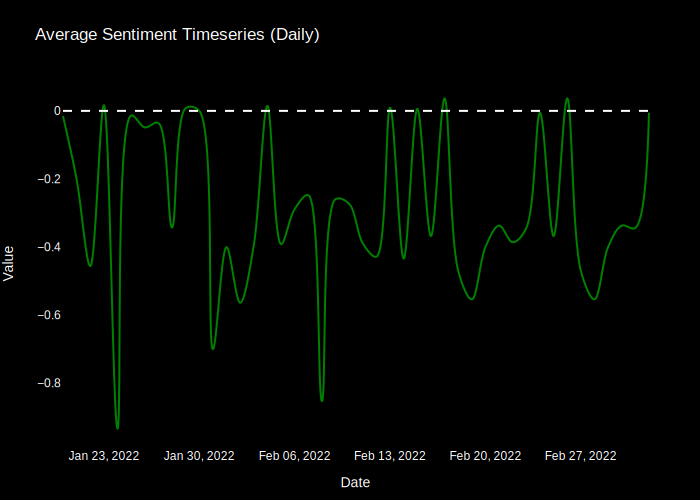

In [20]:
dates = grouped_daily.index
values = grouped_daily["sentiment_positive"] - grouped_daily["sentiment_negative"]

# Create a trace for the time series line
trace = go.Scatter(
    x=dates,
    y=values,
    mode='lines',
    line=dict(shape='spline', smoothing=1, color='green')
)

# Create a figure with the trace
fig = go.Figure(data=[trace])

# Set the layout properties
fig.update_layout(
    title="Average Sentiment Timeseries (Daily)",
    xaxis=dict(
        title="Date",
        showgrid=False,  # Hide x-axis gridlines
        tickformat="%b %d, %Y"  # Customize date tick format
    ),
    yaxis=dict(
        title="Value",
        showgrid=False,  # Hide y-axis gridlines
        zeroline=False  # Hide y-axis zero line
    ),
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black',  # Set paper background color to black
    font=dict(family='Arial', size=12, color='white'),  # Set font style and color
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins for better spacing
    hovermode='x',  # Show hover information for each point on the x-axis
    showlegend=False  # Hide legend
)

# Add a horizontal line at y=0
fig.add_shape(
    type="line",
    x0=dates[0],
    y0=0,
    x1=dates[-1],
    y1=0,
    line=dict(color='white', width=2, dash='dash'),
    name='Horizontal Line'
)

# Display the plot
fig.show("svg")

## Emotions % Distribution

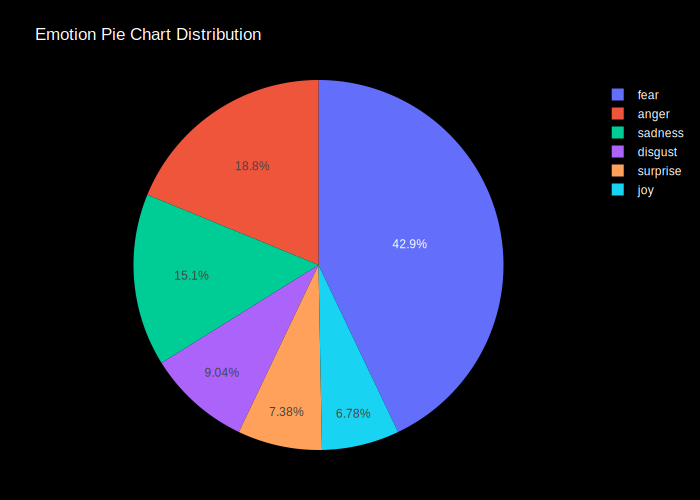

In [21]:
column_sums = df[["joy", "fear", "surprise", "anger", "sadness", "disgust"]].sum()
normalized_values = column_sums.div(column_sums.sum())

# Create the pie chart
labels = normalized_values.index
values = normalized_values.values

pie_chart = go.Pie(labels=labels, values=values)

# Create the figure
fig = go.Figure(data=[pie_chart])

# Set the layout properties
fig.update_layout(
    title="Emotion Pie Chart Distribution",
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black',  # Set paper background color to black
    font=dict(family='Arial', size=12, color='white'),  # Set font style and color
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins for better spacing
    hovermode='x',  # Show hover information for each point on the x-axis
    showlegend=True  # Hide legend
)

# Show the figure
fig.show("svg")

In [22]:
df["sentiment_label"] = df.apply(lambda x: "positive" if x["sentiment_positive"] > 0.5 else "negative", axis=1)
df["sentiment_score"] = df.apply(lambda x: x["sentiment_positive"] + x["sentiment_negative"], axis=1)

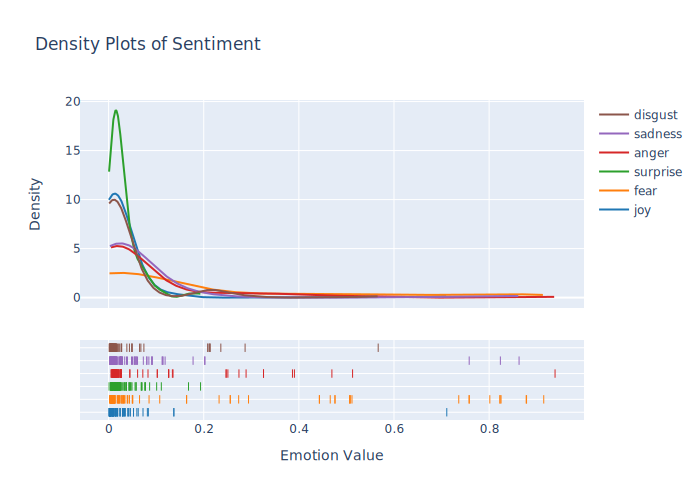

In [24]:
# Get the relevant columns for the distribution plot
columns = ['joy', 'fear', 'surprise', 'anger', 'sadness', "disgust"]

# Create the distribution plot using Plotly FigureFactory
fig = ff.create_distplot(
    [df[column] for column in columns],
    columns,
    show_hist=False
)

# Update the chart layout
fig.update_layout(
    title="Density Plots of Sentiment",
    xaxis_title="Emotion Value",
    yaxis_title="Density"
)

# Show the figure
fig.show("svg")